In [ ]:
# Dataset для обнаружения мошенничества
# Выявляйте мошенничество на ходу с помощью обширного набора данных (более 6,3 млн строк).

# isFraud: 1 - это мошенничество. 0 - не являестя мошенничество.
# isFlaggedFraud: 1 - это 100% мошенничество. 0 - не являестя мошенничество.
# type: типы перевода денег
# amount: сколько переводили денег

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset.csv")

In [8]:
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            str    
 2   amount          float64
 3   nameOrig        str    
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        str    
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), str(3)
memory usage: 534.0 MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df['isFraud'].value_counts(), df['isFlaggedFraud'].value_counts()

In [ ]:
## isFraud: 1 - это мошенничество. 0 - не являестя мошенничество.
#### 8213 - кол'во мошенничества.
#### 6354407 - кол'во не являющихся мошенничеством.

### isFlaggedFraud: 1 - это 100% мошенничество. 0 - не являестя мошенничество.
#### 16 - кол'во 100%-го мошенничества.
#### 6362604 - кол'во не являющихся мошенничеством.

In [ ]:
df.isnull().sum() # где и сколько есть прокусков данных

In [ ]:
df.shape # сколько строк и столбцов

In [ ]:
lines = df.shape[0]
amount_of_fraud = df['isFraud'].value_counts()[1]
fraud_rate = round((amount_of_fraud / lines) * 100,2) # процент мошенничества от общего объема данных
print(f'Процент мошенничества от общего объема данных составляет: {fraud_rate}%')

In [ ]:
df['type'].value_counts().sort_values(ascending=False).plot(
    kind='bar',
    title='Transaction Types',
    color='red',
    xlabel='Transaction Type',
    ylabel='Count',
    ) 
# типы перевода денег и рейтинг их использования

In [ ]:
df.groupby('type')['isFraud'].mean().sort_values(ascending=False).plot(
    kind='bar',
    title='Fraud Rate by Type',
    color='red',
    ylabel='Fraud Rate',
    xlabel='Transaction Type',
) # показывает какие типы перевода денег использовались мошенниками

In [ ]:
df['amount'].describe().astype(int)

In [ ]:
np.log1p(df['amount'])

In [ ]:
amount_log = np.log1p(df['amount'])
sns.histplot(
    amount_log,
    bins=100,
    kde=True,
    color='red',
    )

In [ ]:
df_under_50k = df[df['amount'] < 50000]
sns.boxplot(data=df_under_50k, x='isFraud', y='amount')

In [ ]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
(df['balanceDiffOrig'] < 0).sum()

In [ ]:
(df['balanceDiffDest'] < 0).sum()

In [ ]:
frauds_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(frauds_per_step)
plt.xlabel('step')
plt.ylabel('fraud count')
plt.title('Frauds per step')
plt.grid()
plt.show()


In [ ]:
df.drop(columns='step', inplace=True)

In [15]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C2098525306    3
C400299098     3
C1999539787    3
C1065307291    3
C545315117     3
C1976208114    3
C1784010646    3
C1530544995    3
C1902386530    3
C1677795071    3
Name: count, dtype: int64

In [17]:
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [4]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [5]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

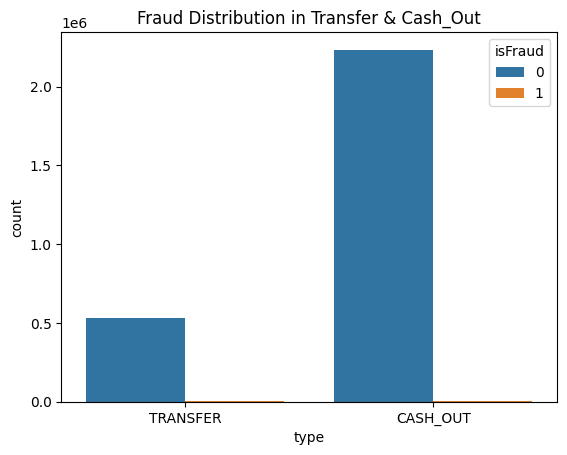

In [9]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title('Fraud Distribution in Transfer & Cash_Out')
plt.show()

In [11]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [12]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


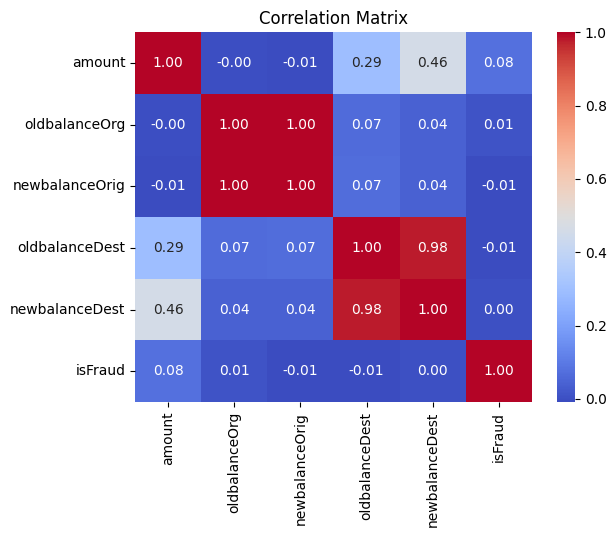

In [13]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]


In [15]:
len(zero_after_transfer)

1188074

In [16]:
zero_after_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [18]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64